In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
sns.set_style('whitegrid')

### Cargamos los datos

In [ ]:
word_vectors = np.load('../corpus_WiNER/word_vectors/wv_train_exp_decay_W_5.npz')
entity_vector = np.load('../corpus_WiNER/entity_vectors/ev_train_exp_decay_W_5.npz')
X_train = word_vectors.items()[0][1][:100000]
y_train = entity_vector.items()[0][1][:100000]
word_vectors = np.load('../corpus_WiNER/word_vectors/wv_dev_exp_decay_W_5.npz')
entity_vector = np.load('../corpus_WiNER/entity_vectors/ev_dev_exp_decay_W_5.npz')
X_dev = word_vectors.items()[0][1][:20000]
y_dev = entity_vector.items()[0][1][:20000]
word_vectors = np.load('../corpus_WiNER/word_vectors/wv_test_exp_decay_W_5.npz')
entity_vector = np.load('../corpus_WiNER/entity_vectors/ev_test_exp_decay_W_5.npz')
X_test = word_vectors.items()[0][1][:20000]
y_test = entity_vector.items()[0][1][:20000]

In [2]:
X_train = np.array([[1.0,2.0,3.0,4.0,5.0], [111.0,222.0,333.0,444.0,555.0], [11.0,22.0,33.0,44.0,55.0]])
y_train = np.array(['class1', 'class2', 'class3'])

In [10]:
X_train.shape

(3, 5)

### Aplicamos PCA

In [18]:
# Reducir dimensionalidad y graficar
pca = PCA(n_components=2)
pca_ft = pca.fit_transform(X_train)
pca_df = pd.DataFrame(data=pca_ft, columns=['PCA_1', 'PCA_2'])
pca_df = pd.concat([pca_df, pd.Series(y_train, name='entityType')], axis=1)
pca_df.head()

,PCA_1,PCA_2,TARGET
0,-296.647939,6.125037e-14,class1
1,519.133894,2.612148e-14,class2
2,-222.485955,-2.071704e-14,class3


### Graficamos

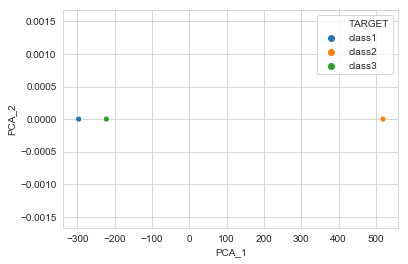

In [20]:
ax = sns.scatterplot(x="PCA_1", y="PCA_2", hue="entityType", data=pca_df)

### Apliquemos Clustering

Utilicemos KMeans de NLTK

In [29]:
NUM_CLUSTERS = 5 # PER - LOC - ORG - MISC - O
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance)
assigned_clusters = kclusterer.cluster(X_train, assign_clusters=True)

In [30]:
for i in range(NUM_CLUSTERS):
    print ('El cluster %i tiene %i elementos' % (i, assigned_clusters.count(i)))
len(assigned_clusters)

El cluster 0 tiene 15649 elementos
El cluster 1 tiene 1482 elementos
El cluster 2 tiene 14900 elementos
El cluster 3 tiene 7969 elementos


40000

In [31]:
words_df = {
        'word': X_train,
        'entityType': y_train,
        'cluster': assigned_clusters
}
words_df = pd.DataFrame(
        news,
        index=[assigned_clusters],
        columns = ['word', 'entityType']
)
print(words_df.loc[0].groupby('entityType').count())
print(words_df.loc[1].groupby('entityType').count())
print(words_df.loc[2].groupby('entityType').count())
print(words_df.loc[3].groupby('entityType').count())

          title
category       
b          3058
e          4454
m          3099
t          5038
          title
category       
b          1239
e           133
m            75
t            35
          title
category       
b          4392
e          2102
m          5377
t          3029
          title
category       
b          1311
e          3311
m          1449
t          1898
